# Homework 7

## Your Name Here (or your names here if you are pair programming)

Student Name: Victor Fonseca

Student UT EID: VRF262

---

Partner Name: Erika Noda

Partner UT EID: edn427

---

Date Created: 3/17/2024

Date Last Modified: 3/20/2024

---

Totoal Points 20. 



## Supprt Vector Machine 

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

C:\Users\erika\AppData\Local\Temp\ipykernel_12712\572230382.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 Implement SVM using libraries (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [3]:
df = heart_df.copy()
df = df[['Target', 'Age', 'Sex', 'Chol']]
df['Target'] = df['Target'].map({'No': 0, 'Yes': 1})
X = df[["Age","Sex","Chol"]]
y=df["Target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# Add your code Here! 
from sklearn import svm
from sklearn.metrics import accuracy_score
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion from Task 1. 
Print the results. 

You may use library methods for this task if you choose to.


In [5]:
# Add your code Here! 
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        35
           1       0.39      0.27      0.32        26

    accuracy                           0.51        61
   macro avg       0.47      0.48      0.47        61
weighted avg       0.49      0.51      0.49        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [6]:
def compute_cost(X, y, W, regularization_factor):
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

In [7]:
def calculate_gradient(X, y, W, regularization_factor):
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
    distance = 1 - (y * np.dot(X, W))
    dw = np.zeros(len(W))
    for ind, d in enumerate(distance):
        #print(X)
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X[ind])
        dw += di

    dw = dw/len(y)  # average
    return dw

In [8]:
X_train=X_train.values
y_train=y_train.values

In [9]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.0001
regularization = 0.01
cost_list = []
weights = np.zeros(3)
for i in range(0, num_iterations):
    cost = compute_cost(X_train, y_train, weights, regularization)
    print("Epoch", i, "Cost is:", cost, "weights", weights)
    cost_list.append(cost)
    grad = calculate_gradient(X_train, y_train, weights, regularization)
    weights = weights - learnin_rate * grad

Epoch 0 Cost is: 0.01 weights [0. 0. 0.]
Epoch 1 Cost is: 0.009854728101674117 weights [2.64421488e-05 3.67768595e-07 1.17595041e-04]
Epoch 2 Cost is: 0.00970948525627518 weights [5.28816533e-05 7.35500413e-07 2.35178323e-04]
Epoch 3 Cost is: 0.009564271457992896 weights [7.93185139e-05 1.10319546e-06 3.52749847e-04]
Epoch 4 Cost is: 0.009419086701018127 weights [1.05752731e-04 1.47085373e-06 4.70309613e-04]
Epoch 5 Cost is: 0.00927393097954291 weights [1.32184304e-04 1.83847524e-06 5.87857623e-04]
Epoch 6 Cost is: 0.009128804287760427 weights [1.58613235e-04 2.20605999e-06 7.05393879e-04]
Epoch 7 Cost is: 0.008983706619865035 weights [1.85039522e-04 2.57360798e-06 8.22918381e-04]
Epoch 8 Cost is: 0.008838637970052245 weights [2.11463167e-04 2.94111921e-06 9.40431130e-04]
Epoch 9 Cost is: 0.008693598332518732 weights [2.37884169e-04 3.30859370e-06 1.05793213e-03]
Epoch 10 Cost is: 0.008548587701462329 weights [2.64302530e-04 3.67603143e-06 1.17542138e-03]
Epoch 11 Cost is: 0.0084036060

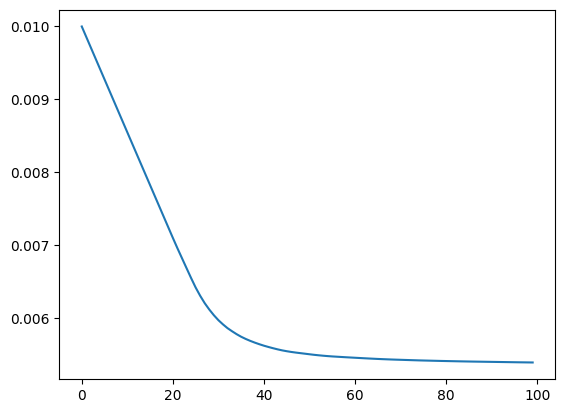

In [10]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [11]:
def predict_svm(weights, X):
    """
    Predict the class between 0 and 1 using learned SVM parameters weights.
    """    
    return np.where(np.dot(X, weights)<0, -1, 1)

In [12]:
y_pred2=predict_svm(weights, X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred2))

Accuracy Score: 0.4262295081967213


# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task, it is not necessary to implement logistic regression from sratch.


In [13]:
# Add your code Here! 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        35
           1       0.39      0.27      0.32        26

    accuracy                           0.51        61
   macro avg       0.47      0.48      0.47        61
weighted avg       0.49      0.51      0.49        61



In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.69      0.77      0.73        26

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.76        61



c:\大学\7_2024_Spring\CS329\CS329_env\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [15]:
print('Based on the accuracy score and f1-scores, the best model is the logistic regression model.')

Based on the accuracy score and f1-scores, the best model is the logistic regression model.


# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [16]:
# create SVC with sigmoid kernel and analyze the results
sig_model = svm.SVC(kernel='sigmoid')
sig_model.fit(X_train, y_train)

sig_pred = sig_model.predict(X_test)
print(classification_report(y_test,sig_pred))

              precision    recall  f1-score   support

           0       0.51      0.63      0.56        35
           1       0.28      0.19      0.23        26

    accuracy                           0.44        61
   macro avg       0.39      0.41      0.40        61
weighted avg       0.41      0.44      0.42        61



c:\大学\7_2024_Spring\CS329\CS329_env\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [21]:
# create SVC with polynomial kernel and analyze the results
poly_model = svm.SVC(kernel='poly')
poly_model.fit(X_train, y_train)

poly_pred = poly_model.predict(X_test)
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.61      0.71      0.66        35
           1       0.50      0.38      0.43        26

    accuracy                           0.57        61
   macro avg       0.55      0.55      0.55        61
weighted avg       0.56      0.57      0.56        61



c:\大学\7_2024_Spring\CS329\CS329_env\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [22]:
# create SVC with linear kernel and analyze the results
lin_model = svm.SVC(kernel='linear')
lin_model.fit(X_train, y_train)

lin_pred = lin_model.predict(X_test)
print(classification_report(y_test, lin_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.66      0.81      0.72        26

    accuracy                           0.74        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.75      0.74      0.74        61



c:\大学\7_2024_Spring\CS329\CS329_env\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [23]:
print('Based on the accuracy score and f1-scores, the best model is the linear kernel model.')

Based on the accuracy score and f1-scores, the best model is the linear kernel model.
